# Proyecto Modulo #1 

 - Pablo Crowley Mora
 - ALondra Bajaras Esparza

## "Acceso a la electricidad en el mundo" 

###### En éste proyecto veremos el porcentaje de varios paises a lo largo del mundo en el cual se tiene acceso a electricidad, se realizara un ajuste de curvas con los datos obtenidos de 1990 a 2016 para poder estimar en que momento éste porcentaje llegará al 95 en todo el mundo

## Objetivos

##### 1.1 Objetivo general 
 Estimar cuando se llegara a un 95 porciento de acceso a la electricidad en todo el mundo.

##### 1.2 Objetivos especificos 
 - Observar el crecimiento constante del acceso a la electricidad en todo el mundo
 - Evaluar graficando los datos obtenidos de 1990 a 2016. 
 - Hacer un ajuste de curvas con los datos ya graficados.
 
##### 1.3 Modelo que representa el problema 
 
 - FUNCIÓN UTILIZADA:

def obj(beta, x, y, n):
    
    return np.sum((y-beta.dot([x**i for i in range(n+1)]))**2)
    
- ¿Qué situación representa el modelo? ¿cuáles son las limitaciones fundamentales?

Representa un modelo de crecimiento y optimización respecto a la accesibilidad de energía eléctrica que presenta el mundo. La optimización representa como el acceso a la electricidad crecerá y en cuanto tiempo esto llegara a ser igual al 95%. 

In [12]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [13]:
archivo ='prueba.csv'
data =pd.read_csv(archivo)
data

,Unnamed: 0,anio,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1,1990,88.445351,0.010000,11.397808,100,100,74.384239,100,90.640823,...,100,74.114670,7.006693,71.392945,77.841415,87.694695,36.009098,59.337940,13.900000,30.357832
1,2,1991,88.780846,0.010000,12.579379,100,100,74.382220,100,91.123672,...,100,75.364212,8.576991,71.600428,78.800000,88.333473,37.441071,60.575081,14.115426,30.718805
2,3,1992,89.115829,0.010000,13.760440,100,100,74.313160,100,91.606018,...,100,76.613235,10.146778,72.584185,79.868790,88.971748,44.100000,61.811710,19.200000,28.200000
3,4,1993,89.447754,0.010000,14.938441,100,100,75.349325,100,92.085304,...,100,77.859207,11.713506,73.237799,80.879166,89.606956,40.300938,63.045284,15.287503,31.436678
4,5,1994,89.773560,0.010000,16.110325,100,100,75.788522,100,92.558472,...,100,79.099052,18.000000,73.522150,80.000000,90.236053,41.723221,64.272736,15.865894,28.100000
5,6,1995,90.090187,0.010000,17.273031,100,100,76.214138,100,93.022461,...,100,80.329727,14.825549,74.026833,82.878502,90.855965,43.136330,65.491013,16.435108,32.130077
6,7,1996,90.394585,0.010000,18.423502,100,100,77.205150,100,93.474213,...,100,81.548157,16.364746,75.155943,83.861343,91.463646,44.537205,57.600000,17.300000,32.459949
7,8,1997,90.683678,0.010000,19.558676,100,100,77.573730,100,93.910675,...,100,78.400000,17.888645,75.852620,84.828888,92.056030,42.600000,67.887794,17.533768,32.774528
8,9,1998,90.954422,0.021977,20.675495,100,100,78.395511,100,94.328773,...,100,83.936089,19.394192,76.508697,85.778084,92.630058,47.290001,64.900000,19.000000,33.070751
9,10,1999,91.203751,0.179635,21.770901,100,100,78.965532,100,94.725464,...,100,85.099457,19.100000,77.609523,86.705864,93.182678,48.635811,70.211159,18.559008,38.400000


In [14]:
x = data.iloc[:,0]
y = data.iloc[:,258]

In [15]:
y

0     71.392945
1     71.600428
2     72.584185
3     73.237799
4     73.522150
5     74.026833
6     75.155943
7     75.852620
8     76.508697
9     77.609523
10    77.726549
11    77.291932
12    78.821025
13    79.457775
14    79.685684
15    80.376481
16    81.221617
17    81.747650
18    82.278332
19    83.211392
20    83.539119
21    82.504646
22    85.041338
23    85.163333
24    85.690705
25    87.028132
26    87.351048
Name: World, dtype: float64

In [16]:
x

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
Name: Unnamed: 0, dtype: int64

In [17]:
def fun_obj(beta,x,y,n):
    return np.sum((y-beta.dot([x**i for i in range(n+1)]))**2)

In [18]:
b01 = np.zeros(2)
ajuste1 = opt.minimize(fun_obj, b01, args=(x,y,1))
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x,y,2))
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x,y,3))
b04 = np.zeros(5)

In [19]:
ajuste1

      fun: 5.058404063288518
 hess_inv: array([[ 0.07834777, -0.00427353],
       [-0.00427353,  0.00030525]])
      jac: array([ 0.00000000e+00, -1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([70.75603682,  0.60638858])

In [20]:
ajuste2

      fun: 5.038850802421265
 hess_inv: array([[ 1.94014057e-01, -2.82034999e-02,  8.54633846e-04],
       [-2.82034999e-02,  5.25615814e-03, -1.76817268e-04],
       [ 8.54633846e-04, -1.76817268e-04,  6.31488223e-06]])
      jac: array([0.00027293, 0.00207072, 0.00398231])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 131
      nit: 5
     njev: 30
   status: 2
  success: False
        x: array([ 7.06888207e+01,  6.20297420e-01, -4.96763223e-04])

In [21]:
ajuste3

      fun: 4.688897283608718
 hess_inv: array([[ 3.97147466e-01, -1.08001052e-01,  7.85160328e-03,
        -1.66614444e-04],
       [-1.08001052e-01,  3.66136643e-02, -2.92634498e-03,
         6.54702227e-05],
       [ 7.85160328e-03, -2.92634498e-03,  2.47403386e-04,
        -5.74068990e-06],
       [-1.66614444e-04,  6.54702227e-05, -5.74068990e-06,
         1.36695698e-07]])
      jac: array([-0.00021964, -0.00148928, -0.01370871, -0.00313699])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 242
      nit: 8
     njev: 46
   status: 2
  success: False
        x: array([ 7.03168962e+01,  7.66557558e-01, -1.33212946e-02,  3.05348292e-04])

In [22]:
xpoints = x
ypoints = y
yhat1 = (ajuste1.x[0]+ajuste1.x[1]*xpoints)
yhat2 = (ajuste2.x[0]+ajuste2.x[1]*xpoints+ajuste2.x[2]*(xpoints**2))
yhat3 = (ajuste3.x[0]+ajuste3.x[1]*xpoints+ajuste3.x[2]*(xpoints**2)+ajuste3.x[3]*(xpoints**3))

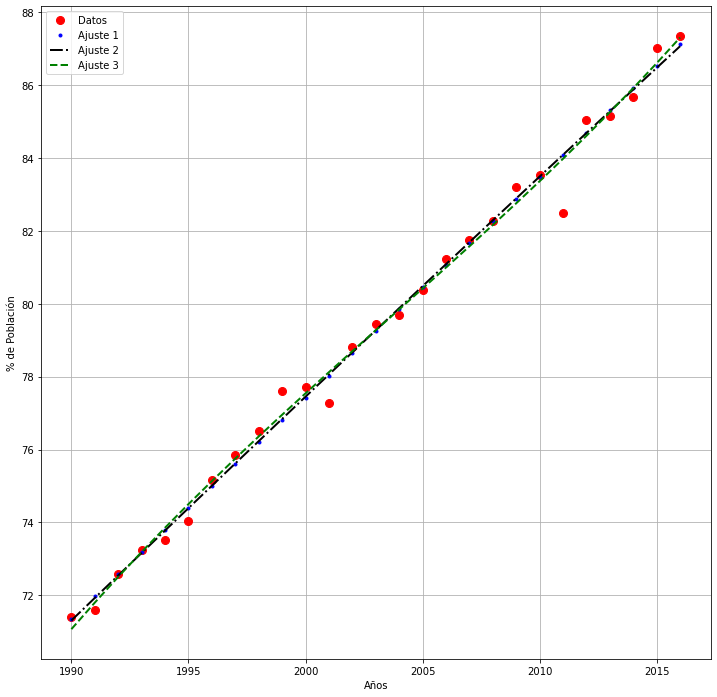

In [23]:
plt.figure(figsize=(12,12))
plt.plot(xpoints+1989, ypoints, 'or', ms=8, label='Datos')
plt.plot(xpoints+1989, yhat1, '.b', lw=2, label='Ajuste 1')
plt.plot(xpoints+1989, yhat2, '-.k', lw=2, label='Ajuste 2')
plt.plot(xpoints+1989, yhat3, '--g', lw=2, label='Ajuste 3')
plt.grid()
plt.xlabel('Años')
plt.ylabel('% de Población')
plt.legend(loc='best')

Text(0, 0.5, 'error')

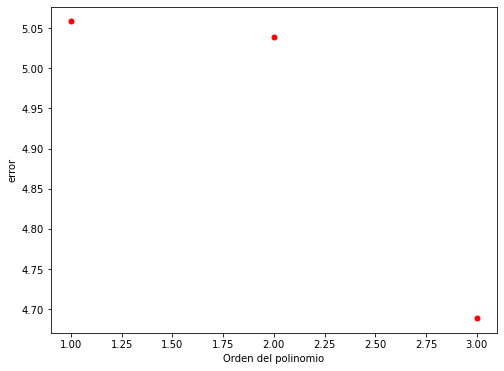

In [24]:
error = [ajuste1.fun, ajuste2.fun, ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4), error, 'ro', ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('error')

In [25]:
xpoints = 27
yhat1 = (ajuste1.x[0]+ajuste1.x[1]*xpoints)
yhat2 = (ajuste2.x[0]+ajuste2.x[1]*xpoints+ajuste2.x[2]*(xpoints**2))
yhat3 = (ajuste3.x[0]+ajuste3.x[1]*xpoints+ajuste3.x[2]*(xpoints**2)+ajuste3.x[3]*(xpoints**3))

In [26]:
yhat1, yhat2, yhat3,

(87.1285285685305, 87.07471066389031, 87.31289693795325)

In [27]:
x = data.iloc[:,0]
y = data.iloc[:,258]
x, y

(0      1
 1      2
 2      3
 3      4
 4      5
 5      6
 6      7
 7      8
 8      9
 9     10
 10    11
 11    12
 12    13
 13    14
 14    15
 15    16
 16    17
 17    18
 18    19
 19    20
 20    21
 21    22
 22    23
 23    24
 24    25
 25    26
 26    27
 Name: Unnamed: 0, dtype: int64,
 0     71.392945
 1     71.600428
 2     72.584185
 3     73.237799
 4     73.522150
 5     74.026833
 6     75.155943
 7     75.852620
 8     76.508697
 9     77.609523
 10    77.726549
 11    77.291932
 12    78.821025
 13    79.457775
 14    79.685684
 15    80.376481
 16    81.221617
 17    81.747650
 18    82.278332
 19    83.211392
 20    83.539119
 21    82.504646
 22    85.041338
 23    85.163333
 24    85.690705
 25    87.028132
 26    87.351048
 Name: World, dtype: float64)

In [28]:
xpoints = 37
yhat1 = (ajuste1.x[0]+ajuste1.x[1]*xpoints)
yhat2 = (ajuste2.x[0]+ajuste2.x[1]*xpoints+ajuste2.x[2]*(xpoints**2))
yhat3 = (ajuste3.x[0]+ajuste3.x[1]*xpoints+ajuste3.x[2]*(xpoints**2)+ajuste3.x[3]*(xpoints**3))

In [29]:
yhat1, yhat2, yhat3

(93.19241440311346, 92.95975639831222, 95.90948055082433)

## Conclusión
Por iteración y valoración, sumándole 37 al consecutivo (1989+37), se puede concluir que en el año 2026 se llegaría al 95 por ciento de cobertura de electricidad en todo el mundo por el polinomio de grado 3, que es el que más se ajusta a los puntos de la gráfica.